# Exercise: Compare Different Strategies
* Lets now go over a great practice opportunity, to really solidify what we have worked on so far
## Recap

> 
* Went over some classical frequentist A/B testing methods, and discussed some drawbacks they may have 
    * Problems: Imprecise confidence intervals and misinterpration of p-values
* We specifcally focused on data that was bernoulli distributed, because it is highly applicable to online businesses and digital media
    * It covers things like click through rates (CTR), conversion rates, and so on
* Later we looked at a few **adaptive** methods that allow you to simultaneously test multiple different versions of something, while at the same time adapting and updating your beliefs about which is best, based on data
* We looked at the mathematical properties of each method to show that, while they work in the sense that they allow you to both **Explore** and **Exploit**, they all use a different strategy
* In the real world, we don't care so much about asymptotic convergence (or the mathematical properties of each method), we want to know which performs best empirically 
* We saw that we can generate synthetic (random) data, and run an algorithm on that data
* We did not write any code for **epsilon-greedy** or **UCB1**, but they should be pretty straight forward 

As an exercise, lets compare each algorithm on the same data, and observe the characteristics.

## Questions to ask:
* which was the easiest to implement, or were they all relatively the same? 
* which converged to the best bandit the fastest?
* What is the total loss compared to what you would've gotten if you already knew which the best bandit was, and played only that bandit every time? (**formally this measure is called regret**)


---
# Exercise: Die Roll
* Working with conjugate priors is a central part of bayesian machine learning 
* We have already seen that a beta prior, with a bernoulli likelihood, are **conjugate priors**
    * that represents a random process like flipping a coin repeatedly 
* We have been assuming that outcomes are binary, but of course this isn't always the case
* So lets generalize this! 
* Suppose we are now rolling a die repeatedly
* what are the conjugate priors for this problem? 

## Categorical Likelihood
* The first thing we want to do is model the likelihood
* Because the outcomes are discrete categorical variables, we model the likelihood as a categorical distribution
* Using the indentity function:
### $$I(true)= 1, \; I(false) =0$$

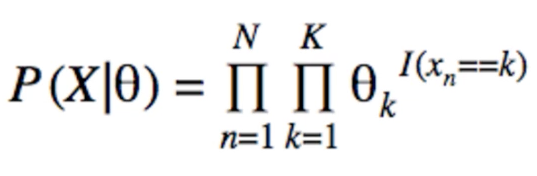

## Dirichlet Prior 
* Next, if we look up conjugate priors on wikipedia, we can see that the dirichlet prior goes with the categorical likelihood 
* **Direchlet** is sort of like a multidimensional version of the beta distribution, so that makes sense 
* Here is the PDF:

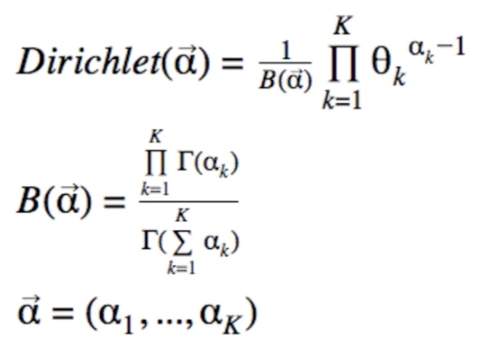

* Note: the B function here is analogous to the B function for the Beta Distribution 
* So we can see a direct relationship to the beta distribution 

## Posterior
* The next step is to combine the likelihood and the prior to determine the posterior 

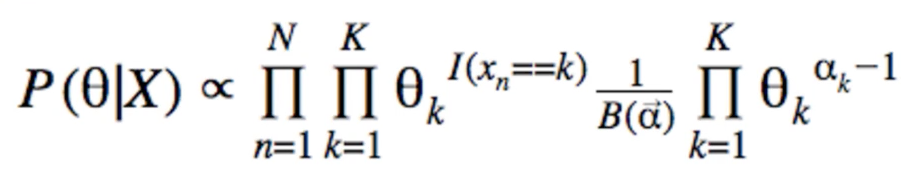

* We can combine all of the $\theta_k$ and move the product over n into the exponent
* This gives us something in the form of a dirichlet distribution 

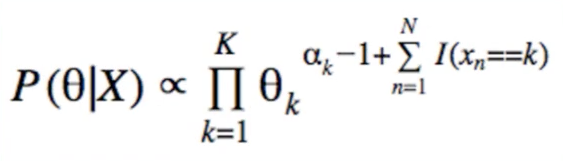

* So the new $\alpha_k$ are just the old $\alpha_k$ plus the number of times we got k

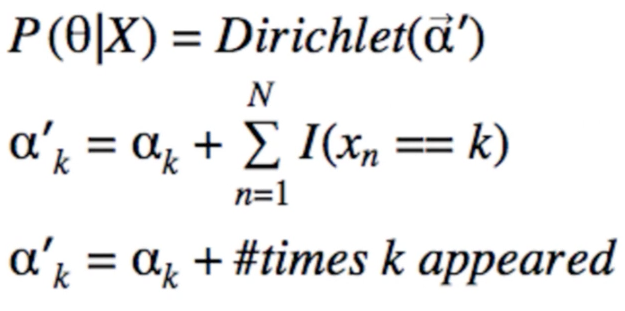

* So we can see that this is just like a multi dimensional coin toss!

---
# Exercise 3: Multivariate Gaussian Likelihood 
* Lets now look at an even more complex example of conjugate priors
* Sometimes the thing we are measuring isn't a coin toss or a category, but instead it is a real number 
* Gaussian's are a common distribution used for modeling real numbers, so lets now use the gaussian as our likelihood
* One thing you may notice right away, that makes this more complicated, is that while the bernoulli and dirichlet likelihood only have 1 parameter, the gaussian has two! **Mean and variance**.
* Since we want to move in small steps, this lecture is only going to place a prior on the mean, and assume the variance is fixed 

## Gaussian Likelihood 
* To start, we are going to be using precision instead of variance 
* precision is just the inverse of variance, and it is a little bit easier to work with than working with the variance directly

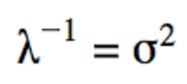

## Conjugate Priors
* lets use wikipedia to look up conjugate priors 
* We can see that the conjugate prior for a gaussian likelihood is also a gaussian (first term is likelihood, second is prior)

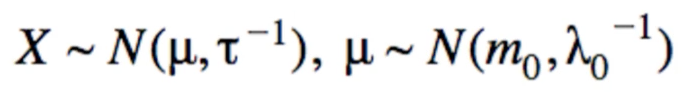

Where N represents a normal gaussian distribution:

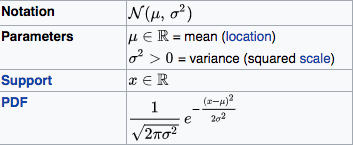

* we will give the gaussian likelihood a mean of 
### $$mean = \mu$$
and a precision of 
### $$precision = \tau$$
and we will give the mean another gaussian distribution with 
### $$mean = m, \; precision = \lambda$$

## 1)
* the first step is to multiply the likelihood and the prior to get a proportionality for the posterior

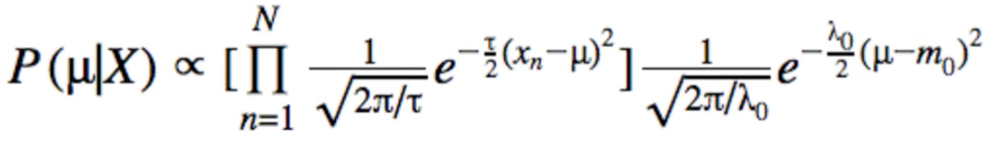

## 2) drop constants, only keep what is in exponent

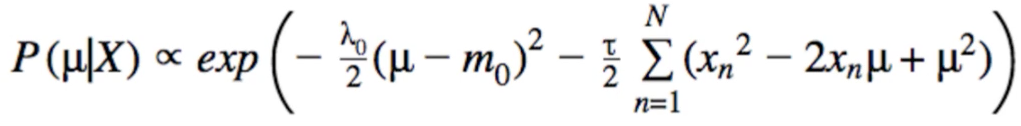

## 3) Collect all terms by order of $\mu$
* Ignore anything that does not depend on $\mu$, because it will go away with normalizing constant

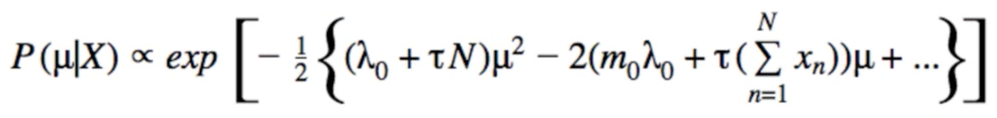

## 4) Recognize what form of equation we are looking for
* for the posterior we want 

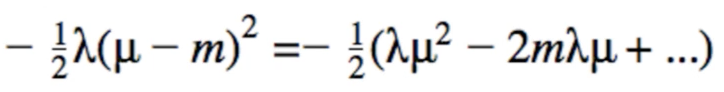

* If we look closely this is exactly the same form as what we just found!

## 5) Equate the two by the degree in $\mu$
* in other words, the squared term goes with the squared term, and the linear term goes with the linear term

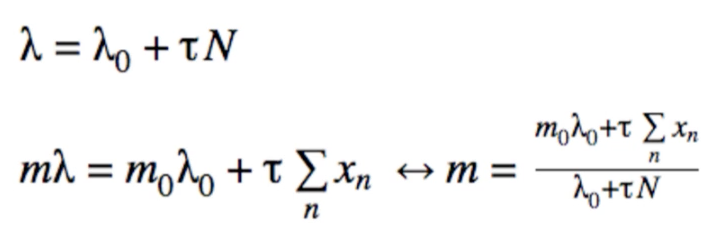

* Note that precision is simpler to solve, while m must be solved after because it depends on lambda 
* we now have our solution for the new m and new lambda, based on the prior parameters and the data we collected 

## Interesting fact
* If you look at the precision, this is the precision for $\mu$, and it increases linearly with N
* so, when N goes to infinity, the precision also goes to infinity
* next if you look at the second term on both sides of m, you will notice that the numerator depends on the sum of X, and the denominator depends on N
* so we can see that in the limit, when N is large, this is going to converge to the sample mean of X 
* which as we know, in the limit is equal to $\mu$

